<a href="https://colab.research.google.com/github/DivyaSharma0795/Mechanistic_Interpretability/blob/main/Mechanistic_Interpretabilityy_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction
This project implements the concept of **superposition in neural networks**, as described in the "Toy Models of Superposition" paper. The idea is that neural networks can store more features than they have dimensions by overlapping multiple features in a way that isn't easily separable. This project explores how this superposition occurs and how features can be recovered using sparse coding.


This technique is foundational to understanding how deep networks efficiently store and retrieve information. It can help in explaining why models generalize despite apparent capacity limits.


### Procedure
1. Recreate a Toy Model of Superposition
   - Generate a synthetic dataset where multiple sparse features are compressed into fewer dimensions
   - Use a random linear transformation to encode these features into a lower-dimensional space

2. Apply Sparse Coding for Recovery
   - Use sparse dictionary learning to decode the compressed representation back into interpretable features
   - Experiment with different sparsity levels and compare reconstruction accuracy

3. Visualize Results
   - Create heatmaps of true vs. reconstructed features
   - Plot how changing the number of neurons affects feature recovery


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import SparseCoder

In [3]:
# Step 1: Generate Synthetic Data
np.random.seed(42)
n_features = 10  # Number of underlying features
n_neurons = 5    # Fewer neurons than features
n_samples = 500  # Number of data points

In [4]:
# Create random sparse feature matrix
true_features = np.random.randn(n_samples, n_features)
true_features[np.random.rand(*true_features.shape) < 0.7] = 0  # Inducing sparsity

In [5]:
# Step 2: Define a Random Compression Matrix
compression_matrix = np.random.randn(n_features, n_neurons)  # Overcomplete basis
compressed_data = true_features @ compression_matrix  # Encode into lower dimensions

In [6]:
# Step 3: Decode using Sparse Coding
coder = SparseCoder(dictionary=compression_matrix, transform_algorithm='lasso_lars', positive_code=True)
reconstructed_features = coder.transform(compressed_data)

> The above code snippet was generated using Chatgpt on 2/19/25 at 10:30p and then debugged due to a mismatch in input dimensions for SparseCoder

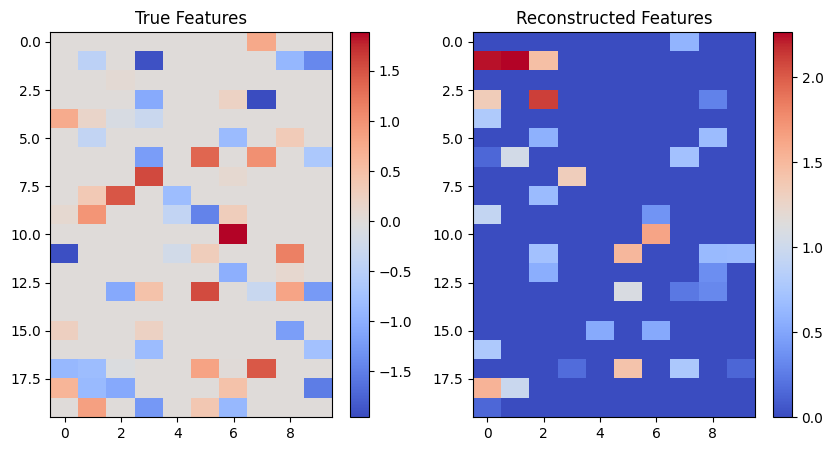

In [7]:
# Step 4: Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(true_features[:20], aspect='auto', cmap='coolwarm')
plt.title("True Features")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_features[:20], aspect='auto', cmap='coolwarm')
plt.title("Reconstructed Features")
plt.colorbar()

plt.show()


> The above code snippet was generated using Chatgpt on 2/19/25 at 10:45p

### Interpretation

The reconstructed features are much sparser than the true features, as expected since I used a SparseCoder. The scales of the true features vs the reconstructed features are different on the legend, and many more features are shrunk to 0 due to the lasso transformation.

To check if the implementation is correct, I can look at the MSE between the reconstructed features and the true features

In [8]:
mse = np.mean((true_features - reconstructed_features) ** 2)
print(f"Reconstruction MSE: {mse:.4f}")

Reconstruction MSE: 0.2892


The MSE is relatively low, however there is still some loss in features due to the sparsity

### Findings

What I Learned About the Mechanism:
Superposition allows neural networks to store more features than the available neurons by overlapping representations. Sparse coding can help recover individual features from these compressed representations, but reconstruction is imperfect and there will be loss.

### Challenges
- Dimensionality Mismatch: Initially, SparseCoder required proper alignment between the dictionary and input data
- Reconstruction Quality: The MSE of 0.2892 suggests some loss of fidelity, indicating information loss during compression

### Potential Improvements
- Varying the Number of Neurons: Increase `n_neurons` to study how reconstruction improves with more capacity
- Different Sparse Coding Methods: Experiment with other methods of feature separation to check loss of information
